In [8]:
import numpy as np
import pandas as pd

# Configurações básicas
np.random.seed(42)
n_clients = 100
n_months = 24
start_date = pd.to_datetime("2022-01-01")

# Gerar informações dos clientes
clientes = pd.DataFrame({
    'Pessoa': [f'Cliente_{i+1}' for i in range(n_clients)],
    'Idade': np.random.randint(18, 70, size=n_clients),
    'UF': np.random.choice(['SP', 'RJ', 'MG', 'ES', 'RS', 'SC', 'PR', 'BA', 'PE'], size=n_clients)
})

# Gerar histórico de gastos mensais
historico_faturas = []
for i, cliente in clientes.iterrows():
    for month in range(n_months):
        ano_mes = start_date + pd.DateOffset(months=month)
        valor_gasto = max(50, np.random.normal(loc=500, scale=200))
        historico_faturas.append({
            'Pessoa': cliente['Pessoa'],
            'Idade': cliente['Idade'],
            'UF': cliente['UF'],
            'Valor_Gasto': valor_gasto,
            'Ano_Mes': ano_mes,
            'Churn': 0  # Inicialmente, não consideramos churn
        })

# Criar DataFrame
df_faturas = pd.DataFrame(historico_faturas)

# Introduzir a variável de churn
# Regra simples: Se o gasto médio dos últimos 3 meses cair abaixo de R$300, o cliente faz churn
for cliente in df_faturas['Pessoa'].unique():
    cliente_faturas = df_faturas[df_faturas['Pessoa'] == cliente].sort_values('Ano_Mes')
    for i in range(3, len(cliente_faturas)):
        media_gastos = cliente_faturas.iloc[i-3:i]['Valor_Gasto'].mean()
        if media_gastos < 300:
            df_faturas.loc[(df_faturas['Pessoa'] == cliente) & (df_faturas['Ano_Mes'] > cliente_faturas.iloc[i]['Ano_Mes']), 'Churn'] = 1
            break

# Exibir as primeiras linhas do DataFrame
print(df_faturas.head())

# Salvar a base de dados em um arquivo CSV para análise posterior
#df_faturas.to_csv('base_churn_cartao_credito.csv', index=False)

# Exibir as últimas linhas do DataFrame para verificar o churn
print(df_faturas.tail(12))  # Mostra os últimos 12 registros


      Pessoa  Idade  UF  Valor_Gasto    Ano_Mes  Churn
0  Cliente_1     56  SP   567.964193 2022-01-01      0
1  Cliente_1     56  SP   498.523970 2022-02-01      0
2  Cliente_1     56  SP   653.459368 2022-03-01      0
3  Cliente_1     56  SP   270.041485 2022-04-01      0
4  Cliente_1     56  SP   344.932779 2022-05-01      0
           Pessoa  Idade  UF  Valor_Gasto    Ano_Mes  Churn
2388  Cliente_100     32  RS   521.149896 2023-01-01      0
2389  Cliente_100     32  RS   194.556016 2023-02-01      0
2390  Cliente_100     32  RS   216.475213 2023-03-01      0
2391  Cliente_100     32  RS   619.971860 2023-04-01      0
2392  Cliente_100     32  RS   470.782636 2023-05-01      0
2393  Cliente_100     32  RS   381.414693 2023-06-01      0
2394  Cliente_100     32  RS   352.602764 2023-07-01      0
2395  Cliente_100     32  RS   360.302241 2023-08-01      0
2396  Cliente_100     32  RS   522.510143 2023-09-01      0
2397  Cliente_100     32  RS   589.007173 2023-10-01      0
2398  Clie

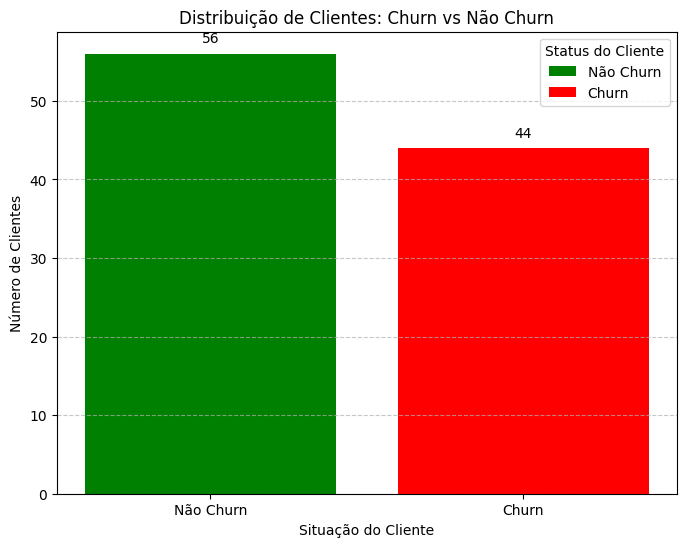

In [9]:
import matplotlib.pyplot as plt

# Contar o número de clientes que fizeram churn e os que não fizeram
churn_counts = df_faturas.groupby('Pessoa')['Churn'].max().value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(['Não Churn', 'Churn'], churn_counts, color=['green', 'red'], label=['Não Churn', 'Churn'])

# Adicionar rótulos de dados acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Adicionar título e legendas
plt.title('Distribuição de Clientes: Churn vs Não Churn')
plt.xlabel('Situação do Cliente')
plt.ylabel('Número de Clientes')
plt.legend(title="Status do Cliente")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()
